# Session 5 : Unsupervised learning

## Preprocessing data

We saw that PCA can be used as a pre-processing step before using supervised learning algorithms in order to improve accuracy or training speed. But sometimes, a simple pre-processing step like normalizing the data can bring a huge improvement.

### No normalization

Before seing any improvements, we need to have a **baseline** (to know if we improve or deteriorate accuracy). We are going to train a classification SVM (with non-linear kernel). Do the following operations :
* load the bread cancer dataset
* separate it into a training and a test set
* create a SVC model, with C=100
* train your model, print its accuracy

I know that you already did it in the last session, but try to see if you can do it again on your own, without any code snippet provided or looking at the correction.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

model = SVC(C=100, gamma="auto")
model.fit(X_train, y_train)
print("Accuracy =", model.score(X_test, y_test))

Accuracy = 0.6293706293706294


### Using built-in normalizers

Let's see what our data looks like before normalization. For each feature, print its minimum and maximum value across all examples in training set.

In [2]:
import numpy as np
minima = np.min(cancer.data, axis=0)
maxima = np.max(cancer.data, axis=0)

for i in range(len(cancer.feature_names)):
    print("{:<25}: MIN = {:6.2f} / MAX = {:7.2f}".format(
          cancer.feature_names[i], minima[i], maxima[i]))

mean radius              : MIN =   6.98 / MAX =   28.11
mean texture             : MIN =   9.71 / MAX =   39.28
mean perimeter           : MIN =  43.79 / MAX =  188.50
mean area                : MIN = 143.50 / MAX = 2501.00
mean smoothness          : MIN =   0.05 / MAX =    0.16
mean compactness         : MIN =   0.02 / MAX =    0.35
mean concavity           : MIN =   0.00 / MAX =    0.43
mean concave points      : MIN =   0.00 / MAX =    0.20
mean symmetry            : MIN =   0.11 / MAX =    0.30
mean fractal dimension   : MIN =   0.05 / MAX =    0.10
radius error             : MIN =   0.11 / MAX =    2.87
texture error            : MIN =   0.36 / MAX =    4.88
perimeter error          : MIN =   0.76 / MAX =   21.98
area error               : MIN =   6.80 / MAX =  542.20
smoothness error         : MIN =   0.00 / MAX =    0.03
compactness error        : MIN =   0.00 / MAX =    0.14
concavity error          : MIN =   0.00 / MAX =    0.40
concave points error     : MIN =   0.00 / MAX = 

Now we can use a normalizer, to make sure that each feature has a value between 0 and 1.

In [3]:
from sklearn.preprocessing import MinMaxScaler

# look at the documentation of MinMaxScaler to find examples
# of use case. Then create a new variable X_train_scaled that
# is the rescaled X_train. Print again the maximum and
# minimum values in X_train_scaled for each features. What is
# the difference ?

scaler = MinMaxScaler()
scaler.fit(cancer.data)

# make sure the MinMaxScaler found the same minimum and
# maximum values as us
same_min = np.isclose(scaler.data_min_, minima)
print("Scaler found same minima ?", np.all(same_min))
same_max = np.isclose(scaler.data_max_, maxima)
print("Scaler found same maxima ?", np.all(same_max))

# then we can rescale our training data
X_train_scaled = scaler.transform(X_train)

# print the new min and max values
print("\nMinima of X_train_scaled")
print(np.min(X_train_scaled, axis=0))
print("\nMaxima of X_train_scaled")
print(np.max(X_train_scaled, axis=0))

Scaler found same minima ? True
Scaler found same maxima ? True

Minima of X_train_scaled
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00057461
 0.         0.00079567 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]

Maxima of X_train_scaled
[1.         0.81501522 1.         1.         0.83118173 0.89571192
 1.         1.         1.         1.         1.         1.
 1.         1.         0.7348472  0.78219725 1.         1.
 0.75389768 1.         1.         1.         1.         1.
 1.         1.         1.         0.9975945  1.         1.        ]


**Answer** : we can see that the scaler did its job : every features are now between 0 (miminum) and 1 (maximum). But we can see that some features have a minimum not equal to 0, or a maximum not equal to 1. This is normal. The scaler was trained on the whole dataset (cancer.data). So the min and max values found by the scaler (and used for the transformation) are not always from X_train.

Use the same scaler (without modifying it) to also rescale the `X_test` variable.

In [4]:
X_test_scaled = scaler.transform(X_test)

Train again a SVC model, but this time train it on the scaled data. Do you see any improvements ?

In [5]:
svc_minmax = SVC(C=100, gamma="auto")
svc_minmax.fit(X_train_scaled, y_train)
print("Accuracy =", svc_minmax.score(X_test_scaled, y_test))

Accuracy = 0.965034965034965


**Answer** : we have a huge improvement (from 0.629 to 0.965).

Many more different types of scaler are implemented in scikit-learn :
* MaxAbsScaler
* RobustScaler
* StandardScaler

In [6]:
# use each type of scaler and train a SVC model for each one.
# Which one is the best ?

# MaxAbsScaler
from sklearn.preprocessing import MaxAbsScaler

scaler_maxabs = MaxAbsScaler()
scaler_maxabs.fit(cancer.data)

X_train_scaled_maxabs = scaler_maxabs.transform(X_train)
X_test_scaled_maxabs  = scaler_maxabs.transform(X_test)

svc_maxabs = SVC(C=100, gamma="auto")
svc_maxabs.fit(X_train_scaled_maxabs, y_train)
print("[MaxAbsScaler] accuracy  =", svc_maxabs.score(
    X_test_scaled_maxabs, y_test))

# RobustScaler
from sklearn.preprocessing import RobustScaler

scaler_robust = RobustScaler()
scaler_robust.fit(cancer.data)

X_train_scaled_robust = scaler_robust.transform(X_train)
X_test_scaled_robust  = scaler_robust.transform(X_test)

svc_robust = SVC(C=100, gamma="auto")
svc_robust.fit(X_train_scaled_robust, y_train)
print("[RobustScaler] accuracy  =", svc_robust.score(
    X_test_scaled_robust, y_test))

# StandardScaler
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()
scaler_standard.fit(cancer.data)

X_train_scaled_standard = scaler_standard.transform(X_train)
X_test_scaled_standard  = scaler_standard.transform(X_test)

svc_standard = SVC(C=100, gamma="auto")
svc_standard.fit(X_train_scaled_standard, y_train)
print("[StandardScaler] accuracy  =", svc_standard.score(
    X_test_scaled_standard, y_test))

[MaxAbsScaler] accuracy  = 0.972027972027972
[RobustScaler] accuracy  = 0.951048951048951
[StandardScaler] accuracy  = 0.965034965034965


**Answer** : the best scaler for the breast dataset seems to be the MaxAbsScaler. The worst one seems to be the RobustScaler. Maybe we do not have a lot of outlier in our dataset, so the robust scaler is not very efficient. A deeper analysis of the dataset would be necessary to answer that question.

In [7]:
# look also at the features of your scaled dataset to see
# differences between the different scalers (do some of
# them keep negative values ? does it change the dimension
# mean/median?)

np.set_printoptions(precision=3)
print("MinMaxScaler")
print("  Means:", X_train_scaled.mean(axis=0)[:5])
print("  Mins:", X_train_scaled.min(axis=0)[:5])
print("  Maxs:", X_train_scaled.max(axis=0)[:5])

print("MaxAbsScaler")
print("  Means:", X_train_scaled_maxabs.mean(axis=0)[:5])
print("  Mins:", X_train_scaled_maxabs.min(axis=0)[:5])
print("  Maxs:", X_train_scaled_maxabs.max(axis=0)[:5])

print("RobustScaler")
print("  Means:", X_train_scaled_robust.mean(axis=0)[:5])
print("  Mins:", X_train_scaled_robust.min(axis=0)[:5])
print("  Maxs:", X_train_scaled_robust.max(axis=0)[:5])

print("StandarScaler")
print("  Means:", X_train_scaled_standard.mean(axis=0)[:5])
print("  Mins:", X_train_scaled_standard.min(axis=0)[:5])
print("  Maxs:", X_train_scaled_standard.max(axis=0)[:5])

MinMaxScaler
  Means: [0.34  0.322 0.334 0.218 0.395]
  Mins: [0. 0. 0. 0. 0.]
  Maxs: [1.    0.815 1.    1.    0.831]
MaxAbsScaler
  Means: [0.504 0.49  0.489 0.263 0.59 ]
  Mins: [0.248 0.247 0.232 0.057 0.322]
  Maxs: [1.    0.861 1.    1.    0.886]
RobustScaler
  Means: [0.193 0.07  0.204 0.296 0.026]
  Mins: [-1.566 -1.622 -1.467 -1.125 -2.284]
  Maxs: [3.613 2.659 3.535 5.381 2.58 ]
StandarScaler
  Means: [ 0.009 -0.013  0.007  0.01   0.   ]
  Mins: [-2.03  -2.229 -1.985 -1.454 -3.112]
  Maxs: [3.971 3.379 3.976 5.251 3.44 ]


**Answer** : the MinMaxScaler rescale the data between 0 and 1, so every values are positive. The MaxAbsScaler rescale the data so that the maximum absolute value is 1. Every value are positive because the original dataset have positive values. But the minimum is not 0, so the mean value for each feature is higher compared to the MinMaxScaler.

The RobustScaler and StandardScaler have other kind of transformation. We can see that the scaled data have some negative values, even if none of them were negative in the original dataset.

## Principal component analysis

### PCA for 2D visualization

We are going use the PCA algorithm on the breast cancer dataset. This dataset has 30 features, so we can not visualize them.

In [8]:
# if you didn't do it before, scale the breast cancer
# dataset with a StandardScaler(). We do not need to have a
# training and test set, because we want to visualize the 
# entire dataset, so you can apply the scaler on the entire
# dataset.

# scaler has been trained in previous part
X_scaled = scaler_standard.transform(cancer.data)

In [9]:
# now we can use PCA
from sklearn.decomposition import PCA

# use the documentation of PCA to create a model that will
# only keep 2 components
pca = PCA(n_components=2)

# then call the .fit() method of PCA on your scaled data
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
# we can now transform the dataset with 30 features into
# a dataset with only 2 features
X_pca = pca.transform(X_scaled)
print("Shape before PCA:", X_scaled.shape)
print("Shape after PCA:", X_pca.shape)

Shape before PCA: (569, 30)
Shape after PCA: (569, 2)


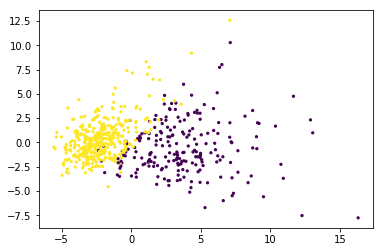

In [12]:
# now plot the new dataset (the one with only 2 features)
# on a 2D plan. Use a different color for the two classes.

import matplotlib.pyplot as plt
plt.scatter(X_pca[:,0], X_pca[:,1], c=cancer.target, s=5)
plt.show()

Hum, interesting... It looks like our
dataset is almost linearly separable. This means that a
linear model (like SVM with linear kernel or logistic regression) could do quite well on this dataset. Let's see if that's the case.

In [13]:
# start by splitting the X_pca dataset into a training
# and a test set with random_state=7 (because we are going 
# to train on this new dataset composed of only 2 features)

X_pca_train, X_pca_test, y_train, y_test = train_test_split(
    X_pca, cancer.target, random_state=7)

model_pca = SVC(kernel="linear", C=100, gamma="auto")
model_pca.fit(X_pca_train, y_train)
print("Accuracy =", model_pca.score(X_pca_test, y_test))

Accuracy = 0.972027972027972


**Answer** : pre-processing the data with PCA before training a linear SVM (a simpler model than a non-linear SVM) brings accuracy from 0.629 to 0.972.

### PCA for 3D visualization

PCA can reduce any dataset with $n$ features into a dataset with 2 or 3 features. And matplotlib can draw functions and points in 3D, so we can project our data into a 3D space.

In [14]:
# repeat the same process as before so you get a new
# dataset for the breast cancer dataset that only contains 
# 3 features.

pca_3d = PCA(n_components=3)
pca_3d.fit(X_scaled)
X_pca_3d = pca_3d.transform(X_scaled)
print("Shape before PCA:", X_scaled.shape)
print("Shape after PCA:", X_pca_3d.shape)

Shape before PCA: (569, 30)
Shape after PCA: (569, 3)


Now we can visualize it in 3D.

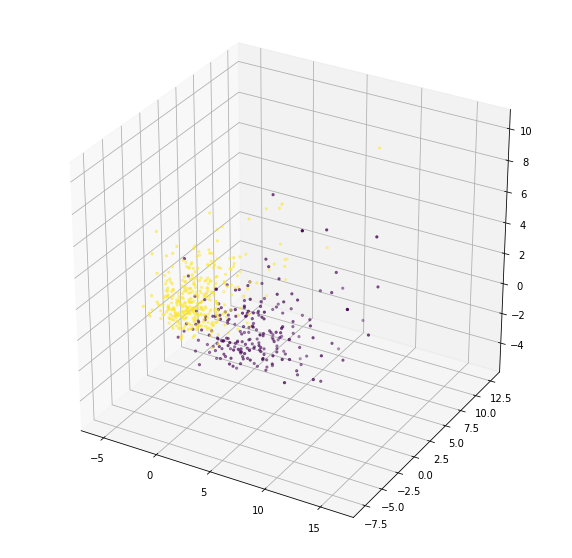

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# use the function below, but replace the value x, y and z
# with the appropriate one from your dataset that contains
# 3 features. Separate the 2 different classes with 2 
# different colors.
ax.scatter(X_pca_3d[:,0], X_pca_3d[:,1], X_pca_3d[:,2],
           c=cancer.target, s=5)
plt.show()

## Clustering with k-means algorithm

In this part, you are going to implement from scratch the k-means algorithm.

### Loading and visualizing the data

The data we are going to use are inside `data-clustering.csv`.

In [ ]:
# look at the first 10 rows of this file with the bash
# command head
!head -n 10 data_clustering.csv

It seems that we have 2 columns, named V1 and V2. Let's load it into 2 ndarrays : x and y.

In [ ]:
import numpy as np
lines = open("data_clustering.csv").read().split()[1:]
x = np.array([line.split(',')[0] for line in lines], 
             dtype=np.float32)
y = np.array([line.split(',')[1] for line in lines], 
             dtype=np.float32)

In [ ]:
# now plot the points (x, y) with matplotlib. Modify the 
# value of the argument s so that points are not too big.
plt.scatter(x, y, s=2)
plt.show()

In [ ]:
# How many clusters do you think there are ?

# there are 3 clusters.

### Distance function

The algorithm requires a distance (so we can compute which centroid is closer for each point). Implement a function `distance` that takes 2 arguments (two vectors as ndarray) and return the distance between them. Hint : the distance between two vectors can be computed with 
\begin{equation}
d(u, v) = \sqrt{\sum_{i=0}^k (u_i - v_i)^2}
\end{equation}

In [ ]:
def distance(v1, v2, ax=0):
    return np.linalg.norm(v1 - v2, axis=ax)

### Algorithm: 1-step

Before implementing the complete algorithm, let's start with only one step. You need the following things before starting :
* define a constant variable K
* declare an empty array `clusters` that has the same size as x. We will put in each cell $i$ the cluster assigned to $x_i$
* create an array `centroids` where you will store the centroids

Then implement only one step from the algorithm described in the course (i.e. one iteration of the **while** loop).

In [ ]:
import numpy as np

# regroup the x and y data into a single matrix (composed
# of n rows, and 2 columns. .T is the transpose operation.
points = np.array([x, y]).T

# initialization. randint(0, len(x), K) will choose K random
# indexes between 0 and the size of x (the second argument
# is exclusive, so randint() cannot return an index equal to
# len(x)). Then we directly select the K points with the []
# notation.
K = 3
clusters  = np.zeros(len(points))
centroids = points[np.random.randint(0, len(x), K)]

# print the selected centroids
print("Initial centroids:")
for i in range(K):
    print("  => ", centroids[i])

# define a function that achieve one step of the k-means
# algorithm
def one_step(points, centroids, clusters):
    """Return the new centroids computed after the step."""
    
    # declare an array of 0 that has the same shape as
    # centroids
    new_centroids = np.zeros_like(centroids)
    
    # assign cluster for each point
    for idx, point in enumerate(points):
        # compute the distance to each centroid. Find the
        # closest one
        min_distance = distance(point, centroids[0])
        index_closest_centroid = 0
        
        # start at 1 because we already processed centroid[0]
        for k in range(1, len(centroids)):
            d = distance(point, centroids[k])
            if (d < min_distance):
                min_distance = d
                index_closest_centroid = k
        
        # then we can know the cluster of point (it is the 
        # same as the index of the closest centroid)
        clusters[idx] = index_closest_centroid
        
    # compute new centroids. For each cluster, compute the
    # average point. This average point is the new centroid.
    for k in range(len(centroids)):
        coordinates  = np.zeros(2)
        cluster_size = 0
        for idx, point in enumerate(points):
            if clusters[idx] == k:
                coordinates  += point
                cluster_size += 1
        
        new_centroids[k] = coordinates / cluster_size
        
    return new_centroids

After running one iteration, you can plot on the same graph :
* all points
* the first centroids chosen at random
* the new updated centroids

Do you see the beginning of an improvement ?

In [ ]:
# print point after initialization
plt.scatter(x, y, c="lightblue", s=2, label="data")
plt.scatter(centroids[:,0], centroids[:,1],
            marker="x", c="red", label="centroid (step 0)")

# do one step, and print new centroids
new_centroids = one_step(points, centroids, clusters)
plt.scatter(new_centroids[:,0], new_centroids[:,1],
            marker="x", c="m", label="centroid (step 1)")

plt.legend()
plt.show()

**Answer** : we can see that one centroid is moving to the bottom-right corner cluster. This means the algorithm is starting to move the centroids to their respective cluster.

### Algorithm : mutiple steps

The algorithm will repeat steps like the one you created a certain amount of time before convergence. We can consider the algorithm has converged when it does not update the values of centroids any longer (i.e. the distance between old and updated centroids is 0 for each centroid). Implement the full algorithm.

In [ ]:
def kmeans(points, K):
    # initialization
    clusters  = np.zeros(len(points))
    centroids = points[np.random.randint(0, len(points), K)]

    # one first step
    new_centroids = one_step(points, centroids, clusters)
    
    e = 0.1
    while distance(new_centroids, centroids, 1).sum() > e:
        # copy the new_centroids into centroids
        centroids = new_centroids[:]
        
        # do one more step
        new_centroids = one_step(points, centroids, clusters)
        
    return new_centroids, clusters

Now, print each cluster on a 2D plan as well as all the points contained inside them. Assign a different color for each group. Do you see something that seems correct ? (i.e. as a human, what would have you done ?)

In [ ]:
final_centroids, clusters = kmeans(points, K)
plt.scatter(points[:, 0], points[:, 1], c=clusters, s=2)
plt.scatter(final_centroids[:,0], final_centroids[:,1],
            marker="x", c="red")
plt.show()

# the clustering is correct, and each centroid found by the
# algorithm is in the middle of its cluster.

Run again your algorithm but with a different value for k. What happens ? Do you think it is a good idea to put a high value for k (k > 10) when the number of clusters is small (< 5) ?

In [ ]:
final_centroids, clusters = kmeans(points, 12)
plt.scatter(points[:, 0], points[:, 1], c=clusters, s=2)
plt.scatter(final_centroids[:,0], final_centroids[:,1],
            marker="x", c="red")
plt.show()

**Answer** : when K is high compared to the real number of clusters, the algorithm separate clusters into subclusters. This is not correct because 2 points that were close in the original dataset (and belong to the same cluster) will be into 2 different clusters. The optimal value for K should match the number of real cluster.

If it is not possible to guess the real number of clusters of the original dataset, one can use some metrics (such as the inter-cluster distance or the intra-cluster distance) to find the optimal value for K.

### Optimized version of k-means

Numpy is a library that is **very optimized for vectorized operations** : instead of doing operations element by element on an array, the operation is done on the whole array, to speed up computation. In our case, we can optimize the k-means algorithm by computing the distance between each point and all the centroids with only 1 operation (instead of iterating all the points, then all the centroids, then choosing the one with minimal distance).

In [ ]:
def kmeans_optimized(points, K):
    # initialization
    centroids = points[np.random.randint(0, len(points), K)]
    
    # one first step
    distances = np.apply_along_axis(distance, 1, points, 
                                    v2=centroids, ax=1)
    clusters = distances.argmin(axis=1)
    new_centroids = np.zeros_like(centroids)
    for k in range(K):
        idx = np.argwhere(clusters == k)
        new_centroids[k] = points[idx].sum(axis=0) / len(idx)

    e = 0.1
    while distance(new_centroids, centroids, 1).sum() > e:
        # copy the new_centroids into centroids
        centroids = new_centroids[:]
        
        # do one more step
        clusters = np.apply_along_axis(distance, 1, points, 
                     v2=centroids, ax=1).argmin(axis=1)
        new_centroids = np.zeros_like(centroids)
        for k in range(K):
            idx = np.argwhere(clusters == k)
            new_centroids[k] = points[idx].sum(axis=0)
            new_centroids[k] /= len(idx)
    
    return new_centroids, clusters

In [ ]:
# test the kmeans_optimized function
final_centroids, clusters = kmeans_optimized(points, 3)
plt.scatter(points[:, 0], points[:, 1], c=clusters, s=2)
plt.scatter(final_centroids[:,0], final_centroids[:,1],
            marker="x", c="red")
plt.show()

We can evaluate the performance improvement brought by the optimized version of the k-means algorithms with the magic command `%time`.

In [ ]:
%time _ = kmeans(points, 3)

In [ ]:
%time _ = kmeans_optimized(points, 3)

In [ ]:
%time _ = kmeans(points, 12)

In [ ]:
%time _ = kmeans_optimized(points, 12)

We have almost a x10 speed improvement. The improvement is more visible when K is high.